# Import Necessary Libraries

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import scipy as sp
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import shapiro
from scipy.stats import normaltest
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from scipy import stats
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

## Read in Data to DataFrame

In [2]:
df = pd.read_csv('vehicles.csv')

In [3]:
df.drop(columns=['id', 'county', 'url', 'region_url', 'image_url', 'description', 'vin', 'region', 'model', 'lat', 'long'], inplace=True)

In [4]:
df = df[df['price'] > 500]
df = df[df['price'] < 5000000]

In [5]:
df = df[df['odometer'] < 400000 ]

In [6]:
df.dropna(subset = ['manufacturer'], inplace = True)

In [7]:
df.dropna(subset = ['condition'], inplace = True)

In [8]:
df.dropna(subset=['size'], inplace = True)

In [9]:
df.dropna(subset = ['odometer'], inplace = True)

In [10]:
df.dropna(subset = ['fuel'], inplace = True)

In [11]:
title_dict = {'clean':1, 'rebuilt':1, 'salvage':0, 'lien':0, 'missing':0, 'parts only':0}
df['title_status'].replace(title_dict, inplace = True)

In [12]:
condition_dict = {'excellent':'good', 'new':'good', 'good':'ok', 'like new':'ok', 'fair':'poor', 'salvage':np.nan}
df.condition.replace(condition_dict, inplace = True)
df.dropna(subset = ['condition'], inplace = True)

In [13]:
cylinder_dict = {'12 cylinders':10, '10 cylinders':10, '8 cylinders':8, '6 cylinders':6, '5 cylinders':5, '4 cylinders':4, '3 cylinders':3, 'other':np.nan}
df.cylinders.replace(cylinder_dict, inplace = True)
df.dropna(subset = ['cylinders'], inplace = True)

In [14]:
manufact_dict1 = {'ford': 1, 'chevrolet':1, 'toyota':3, 'honda':3, 'nissan':3, 'gmc':1, 'ram':1, 'jeep':1,
       'dodge':1, 'bmw':2, 'volkswagen':2, 'hyundai':3, 'subaru':1, 'mercedes-benz':2,
       'chrysler':1, 'kia':3, 'cadillac':1, 'lexus':3, 'buick':1, 'mazda':3, 'audi':2,
       'pontiac':1, 'acura':3, 'lincoln':1, 'infiniti':3, 'volvo':2, 'mitsubishi':3,
       'mercury':1, 'mini':2, 'saturn':1, 'rover':2, 'jaguar':2, 'fiat':2, 'alfa-romeo':2,
       'harley-davidson':np.nan, 'datsun':2, 'land rover':2, 'ferrari':2, 'porche':2,
       'aston-martin':2, 'morgan':2, 'tesla':1, 'hennessey':np.nan}
df.manufacturer.replace(manufact_dict1, inplace = True)
df.dropna(subset = ['manufacturer'], inplace = True)
manufact_dict2 = {1:'usa', 2:'euro', 3:'asia'}
df.manufacturer.replace(manufact_dict2, inplace = True)

In [15]:
state_dict = {'ca':1, 'fl':1, 'ny':1, 'tx':1, 'mi':1, 'wi':1, 'oh':1, 'nc':1, 'pa':1, 'or':1, 'va':1, 'mn':1,
       'tn':0, 'co':0, 'ma':1, 'ia':0, 'il':1, 'in':1, 'al':1, 'nj':1, 'az':0, 'ky':0, 'sc':1, 'ks':0,
       'mo':0, 'ok':0, 'id':0, 'mt':0, 'ga':1, 'ct':1, 'vt':0, 'ar':0, 'wa':1, 'nm':0, 'md':1, 'la':1,
       'nh':1, 'ms':1, 'ri':1, 'ak':1, 'me':1, 'dc':1, 'nv':0, 'sd':0, 'hi':1, 'ne':0, 'de':1, 'nd':0,
       'wv':0, 'ut':0, 'wy':0} 
df.state.replace(state_dict, inplace = True)
df.dropna(subset = ['state'], inplace = True)
df['coast'] = df['state']
df.drop(columns = ['state'], inplace = True)

In [16]:
color_dict={'white':1, 'black':1, 'silver':1, 'grey':1, 'blue':1, 'red':1, 'green':1, 'brown':1,
       'custom':0, 'yellow':0, 'orange':0, 'purple':0}
df.paint_color.replace(color_dict, inplace = True)
df.dropna(subset = ['paint_color'], inplace = True)

In [17]:
transmission_dict = {'automatic':1, 'other':1, 'manual':0}
df.transmission.replace(transmission_dict, inplace = True)
df.dropna(subset = ['transmission'], inplace = True)

In [18]:
drive_dict = {'4wd':1, 'fwd':0, 'rwd':0}
df.drive.replace(drive_dict, inplace = True)
df.dropna(subset = ['drive'], inplace = True)

In [19]:
type_dict = {'SUV':'suv', 'sedan':'car', 'truck':'truck', 'pickup':'truck', 'coupe':'car', 'van':'van', 'hatchback':'car',
       'mini-van':'van', 'convertible':'car', 'wagon':'car', 'other':np.nan, 'offroad':'suv', 'bus':'van'}
df.type.replace(type_dict, inplace = True)
df.dropna(subset = ['type'], inplace = True)

In [20]:
fuel_dict = {'hybrid':'other', 'electric':'other'}
df.fuel.replace(fuel_dict, inplace = True)

In [21]:
df.dropna(inplace = True)

In [22]:
df.shape

(99577, 14)

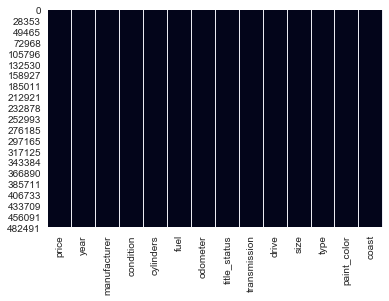

In [23]:
sns.heatmap(df.isnull(), cbar = False)

In [24]:
df['price'] = [float(i) for i in df['price']]

In [25]:
df['log_price'] = np.log(df.price)

In [26]:
df['age'] = 2020 - df['year']

In [27]:
df.reset_index(inplace=True)

In [28]:
df.drop(columns = ['index', 'year'], inplace = True)

## EDA

### Check the disribution of our target variable (price)

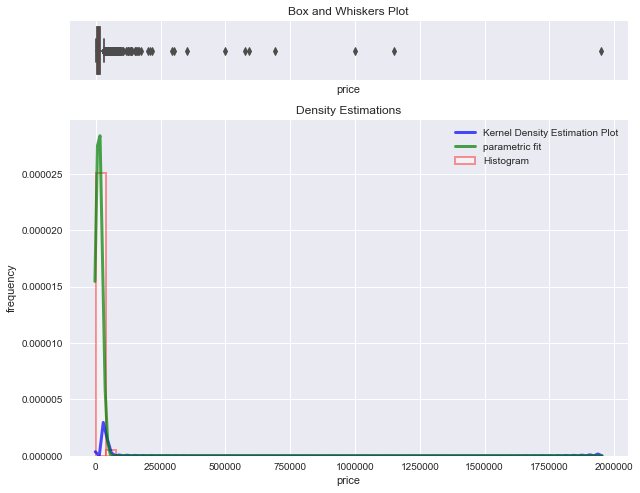

In [29]:
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8) )

sns.distplot(df['price'], 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'red',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "blue",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 },
             fit= sp.stats.norm, fit_kws = {'color' : 'green',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax2)
ax2.set_ylabel('frequency')
ax2.set_title('Density Estimations')
sns.boxplot(x=df['price'], ax = ax,color = 'red')
ax.set_title('Box and Whiskers Plot')
plt.legend();

### Check the log transformed distribution of our target to see if we can tame the skew

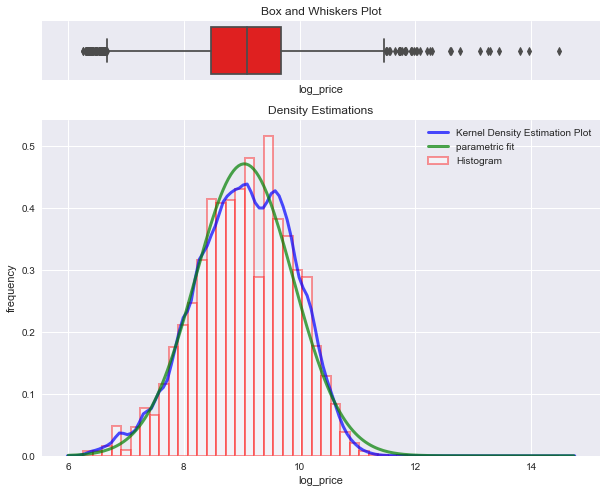

In [30]:
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8) )

sns.distplot(df['log_price'], 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'red',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "blue",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 },
             fit= sp.stats.norm, fit_kws = {'color' : 'green',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax2)
ax2.set_ylabel('frequency')
ax2.set_title('Density Estimations')
sns.boxplot(x=df['log_price'], ax = ax,color = 'red')
ax.set_title('Box and Whiskers Plot')
plt.legend();

### Q1: Which continent's cars are most expensive on average?

#### One way ANOVA test

##### H0: price at different continents are the same   Ha: price at different continents are different

In [31]:
df.groupby('manufacturer')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
manufacturer,,,,,,,,
asia,27272.0,9084.493070,9159.178968,550.0,4200.0,6995.0,11900.0,690000.0
euro,9827.0,10890.900784,14806.059330,550.0,4987.0,8000.0,13900.0,1000000.0
usa,62478.0,13184.102836,14366.957591,522.0,4998.0,9995.0,17995.0,1950000.0


In [32]:
asia = df.loc[df['manufacturer'] == 'asia']
euro = df.loc[df['manufacturer'] == "euro"]
usa = df.loc[df['manufacturer'] == "usa"]

In [33]:
stats.f_oneway(asia['price'], euro['price'], usa['price'])

F_onewayResult(statistic=944.1687008794038, pvalue=0.0)

##### p_value < 0.05 --> reject H0 , which means there is a correlation between car price and continent of origin

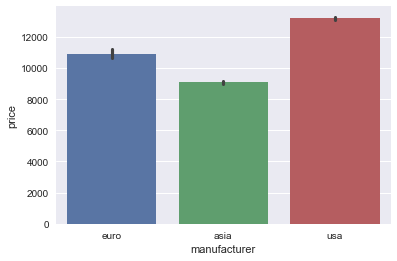

In [34]:
sns.barplot(y=df.price, x=df['manufacturer'])

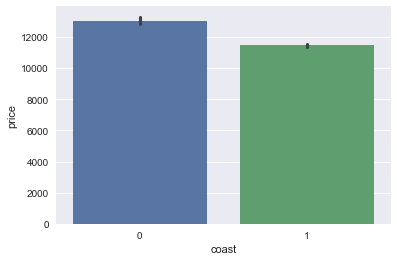

In [35]:
sns.barplot(y=df.price, x=df['coast'])

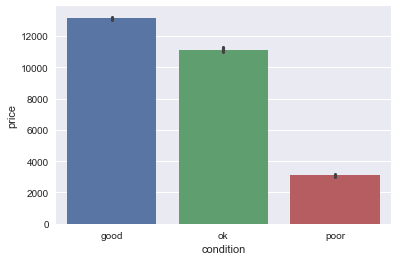

In [36]:
sns.barplot(y=df.price, x=df['condition'])

### Q2: Does higher cylinder count lead to higher price?

#### One way ANOVA test

##### H0: price with different cylinders are the same   Ha: price with different cylinders are different

In [37]:
df.groupby('cylinders')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
3.0,105.0,8476.800000,5740.507392,875.0,4837.0,7498.0,10500.0,30000.0
4.0,29688.0,8442.883421,8356.628817,549.0,4000.0,6995.0,11000.0,1000000.0
5.0,955.0,6456.601047,7541.194036,575.0,3775.0,5400.0,7750.0,200000.0
6.0,35277.0,11150.237520,11317.933318,522.0,4200.0,7950.0,15000.0,690000.0
8.0,32771.0,15694.887858,17463.685321,523.0,6850.0,12995.0,20990.0,1950000.0
10.0,781.0,16774.665813,12834.482163,999.0,7500.0,14500.0,22990.0,168000.0


In [38]:
cylinder_3 = df.loc[df['cylinders'] == 3.0]
cylinder_4 = df.loc[df['cylinders'] == 4.0]
cylinder_5 = df.loc[df['cylinders'] == 5.0]
cylinder_6 = df.loc[df['cylinders'] == 6.0]
cylinder_8 = df.loc[df['cylinders'] == 8.0]
cylinder_10 = df.loc[df['cylinders'] == 10.0]

In [39]:
stats.f_oneway(cylinder_3['price'], cylinder_4['price'],cylinder_5['price'],cylinder_6['price'], cylinder_8['price'],cylinder_10['price'])

F_onewayResult(statistic=1061.7816733511129, pvalue=0.0)

#### p_value < 0.05 --> reject H0 , which means there is a correlation between car price and cylinder count

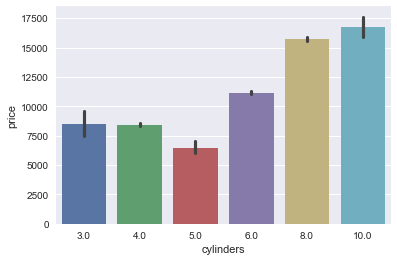

In [40]:
sns.barplot(y=df.price, x=df['cylinders'])

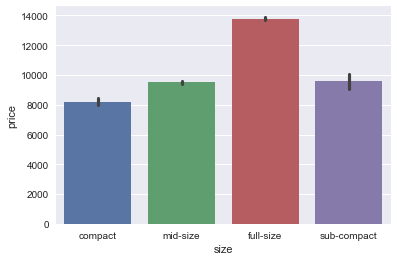

In [41]:
sns.barplot(y=df.price, x=df['size'])

### Q3: How old, on average, is a car when posted for sale in secondary markets?

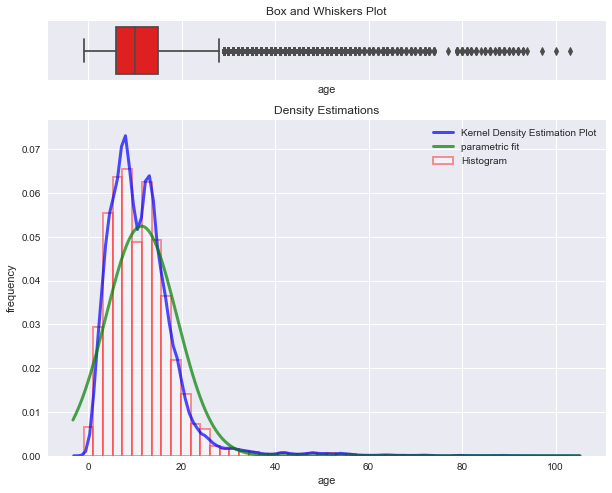

In [42]:
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8) )

sns.distplot(df['age'], 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'red',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "blue",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 },
             fit= sp.stats.norm, fit_kws = {'color' : 'green',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax2)
ax2.set_title('Density Estimations')
ax2.set_ylabel('frequency')
sns.boxplot(x=df['age'], ax = ax,color = 'red')
ax.set_title('Box and Whiskers Plot')
#ax2.set(ylim=(0, .08))
#plt.ylim(0,0.11)
plt.legend();

In [43]:
df.age.describe()

count    99577.000000
mean        11.377597
std          7.602129
min         -1.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        103.000000
Name: age, dtype: float64

#### Calculate a 95% confidence interval

In [44]:
n = len(df['age'])
dr_mean = df['age'].mean()
dr_std = df['age'].std()
t_value_dr = stats.t.ppf(0.975, n-1)
margin_error_dr = t_value_dr*dr_std/(n**0.5)
conf_int_dr = (dr_mean - margin_error_dr, dr_mean + margin_error_dr)
conf_int_dr

(11.330379074369858, 11.424815398249322)

#### We can say with 95% confidence that a similar sample will have a mean number of age between 11.33 and 11.42 years.

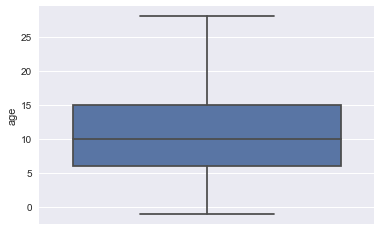

In [45]:
sns.boxplot(y=df['age'], showfliers=False)

In [46]:
log_age_array = np.log(df[df['age'] > 0]['age'])

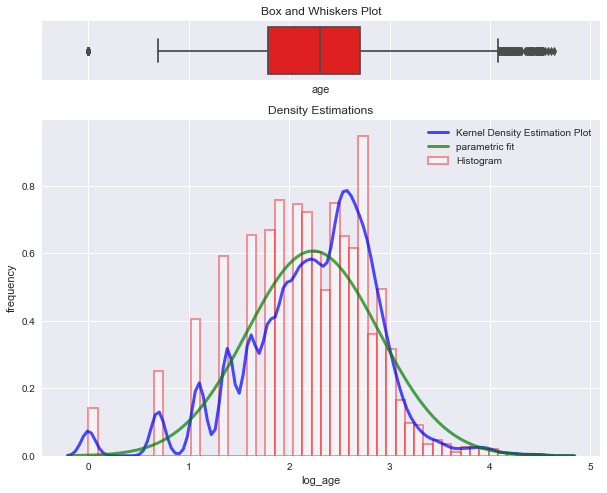

In [47]:
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8) )

sns.distplot(log_age_array, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'red',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "blue",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 },
             fit= sp.stats.norm, fit_kws = {'color' : 'green',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax2)
ax2.set_title('Density Estimations')

sns.boxplot(x=log_age_array, ax = ax,color = 'red')
ax2.set_xlabel('log_age')
ax2.set_ylabel('frequency')
ax.set_title('Box and Whiskers Plot')
plt.legend();

In [48]:
print("Mean: {}".format(np.exp(log_age_array.mean())))
print("Median: {}".format(np.exp(log_age_array.median())))
print("Arithmetic average of mean and median: {}".format((np.exp(log_age_array.median())+np.exp(log_age_array.mean()))/2))

Mean: 9.370536440918384
Median: 10.000000000000002
Arithmetic average of mean and median: 9.685268220459193


In [49]:
cols = ['cylinders', 'odometer', 'title_status', 'transmission', 'drive', 'paint_color', 'coast', 'age']
n = 4
row_groups = [cols[i:i+n] for i in range(0, len(cols) , n) ]

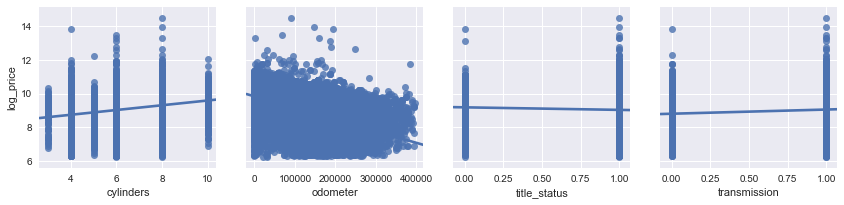

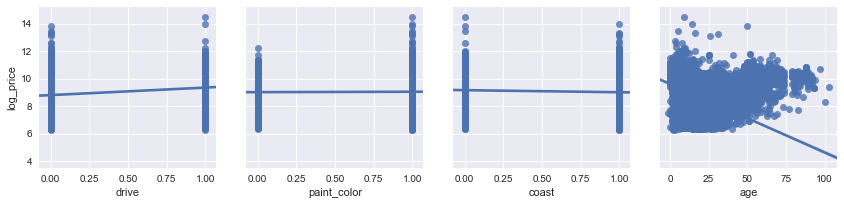

In [50]:
for i in row_groups:
    eda = sns.pairplot(data=df, y_vars=['log_price'], x_vars=i, kind='reg', height =3)

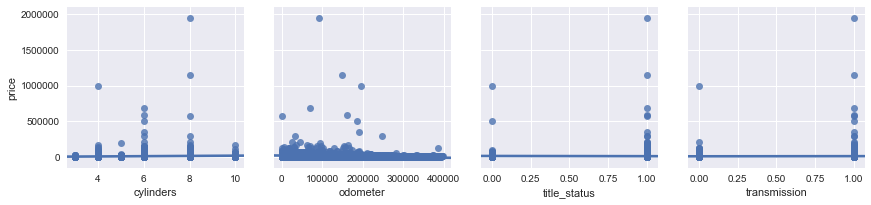

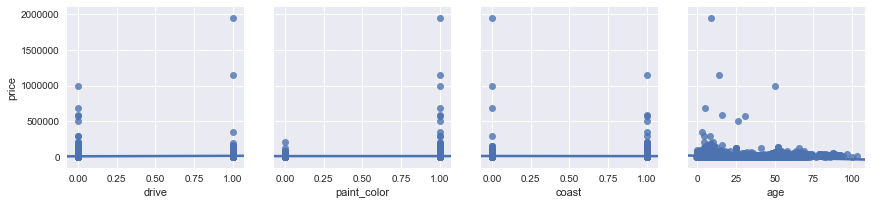

In [51]:
for i in row_groups:
    eda = sns.pairplot(data=df, y_vars=['price'], x_vars=i, kind='reg', height =3)

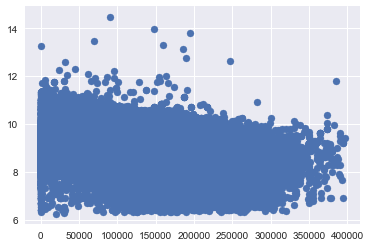

In [52]:
plt.scatter(df.odometer, df.log_price)

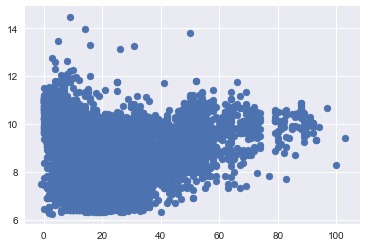

In [53]:
plt.scatter(df.age, df.log_price)

## Create Dummy Variables

In [54]:
dummies_df = pd.get_dummies(df, columns = ['manufacturer', 'condition', 'cylinders', 'fuel', 'size', 'type'], drop_first = True)

In [55]:
dummies_df.drop(columns = ['price', 'log_price'], inplace = True)


In [56]:
X = dummies_df
y = df[['log_price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [57]:
np.exp(y_test).describe()

,log_price
count,19916.000000
mean,11713.924081
std,10005.775578
min,549.000000
25%,4800.000000
50%,8800.000000
75%,15900.000000
max,215420.000000


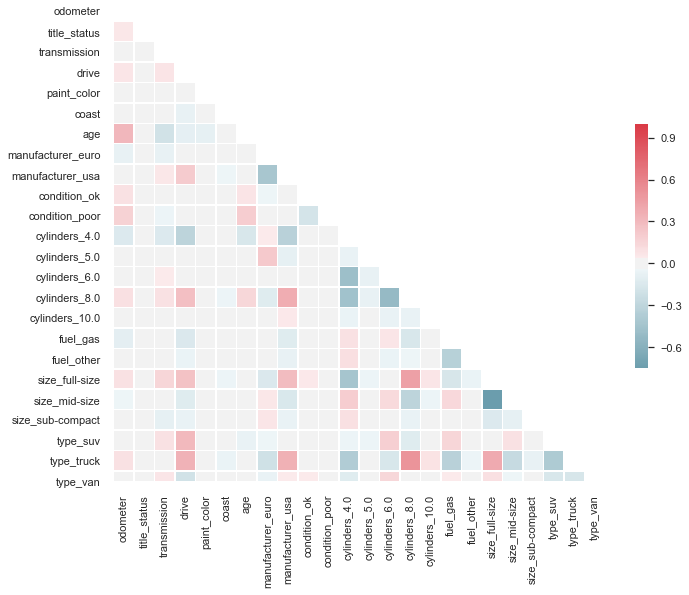

In [58]:
sns.set(style="white")

corr = X_train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### First Ordinary-Least-Squares model (Summary Stats)

In [59]:
X.columns

Index(['odometer', 'title_status', 'transmission', 'drive', 'paint_color',
       'coast', 'age', 'manufacturer_euro', 'manufacturer_usa', 'condition_ok',
       'condition_poor', 'cylinders_4.0', 'cylinders_5.0', 'cylinders_6.0',
       'cylinders_8.0', 'cylinders_10.0', 'fuel_gas', 'fuel_other',
       'size_full-size', 'size_mid-size', 'size_sub-compact', 'type_suv',
       'type_truck', 'type_van'],
      dtype='object')

#### Create formula for basic OLS model (Using StatsModels)

In [60]:
target_squigley_features = 'log_price~'
for i in range(len(X.columns)):
    if i < (len(X.columns) - 1):
        if i in range(11,16):
            target_squigley_features += '{}+'.format(X.columns[i][:-2])
        elif i in range(18,20):
            target_squigley_features += '{}+'.format(X.columns[i][:-5])
        elif i == 20:
            target_squigley_features += '{}+'.format(X.columns[i][:-8])
        else:
            target_squigley_features += '{}+'.format(X.columns[i])  
    else:
        target_squigley_features += '{}'.format(X.columns[i])
X.columns = target_squigley_features[10:].split("+")

In [61]:
print(X.columns)
print(len(X.columns))

Index(['odometer', 'title_status', 'transmission', 'drive', 'paint_color',
       'coast', 'age', 'manufacturer_euro', 'manufacturer_usa', 'condition_ok',
       'condition_poor', 'cylinders_4', 'cylinders_5', 'cylinders_6',
       'cylinders_8', 'cylinders_10', 'fuel_gas', 'fuel_other', 'size_full',
       'size_mid', 'size_sub', 'type_suv', 'type_truck', 'type_van'],
      dtype='object')
24


In [62]:
frames = [X, y]
combo_df = pd.concat(frames,axis=1)
mlr_model = ols(formula=target_squigley_features, data=combo_df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     7246.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:46:34   Log-Likelihood:                -74478.
No. Observations:               99577   AIC:                         1.490e+05
Df Residuals:                   99552   BIC:                         1.492e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.4667      0.053    199.280      0.000      10.364      10.570
odometer          -6.166e-06   2.89e-08   -213.063      0.000   -6.22e-06   -6.11e-06
title_status          0.0153      0.011      1.456      0.145      -0.005       0.036
transmission         -0.2087      0.007    -30.174      0.000      -0.222      -0.195
drive                 0.2148      0.004     51.766      0.000       0.207       0.223
paint_color          -0.0696      0.008     -8.565      0.000      -0.086      -0.054
coast                -0.0792      0.004    -20.659      0.000      -0.087      -0.072
age                  -0.0338      0.000   -139.052      0.000      -0.034      -0.033
manufacturer_euro     0.0322      0.006      5.000      0.000       0.020       0.045
manufacturer_usa     -0.0804      0.004    -19.313      0.000      -0.089      -0.072
condition_ok         -0.1385      0.003    -41.248      0.000      -0.145      -0.132
condition_poor       -0.8156      0.009    -87.745      0.000      -0.834      -0.797
cylinders_4           0.1715      0.050      3.426      0.001       0.073       0.270
cylinders_5           0.1047      0.053      1.982      0.047       0.001       0.208
cylinders_6           0.3549      0.050      7.077      0.000       0.257       0.453
cylinders_8           0.6456      0.050     12.841      0.000       0.547       0.744
cylinders_10          0.8316      0.053     15.559      0.000       0.727       0.936
fuel_gas             -0.6241      0.007    -93.641      0.000      -0.637      -0.611
fuel_other           -0.4115      0.017    -24.172      0.000      -0.445      -0.378
size_full             0.0727      0.006     11.676      0.000       0.061       0.085
size_mid              0.0243      0.006      4.095      0.000       0.013       0.036
size_sub              0.0316      0.014      2.211      0.027       0.004       0.060
type_suv              0.1613      0.005     32.115      0.000       0.151       0.171
type_truck            0.3509      0.006     59.536      0.000       0.339       0.362
type_van              0.1678      0.008     22.348      0.000       0.153       0.183
==============================================================================
Omnibus:                    12271.351   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           137929.014
Skew:                          -0.094   Prob(JB):                         0.00
Kurtosis:                       8.763   Cond. No.                     9.95e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+06. This might indicate that there are
strong multicollin

### Define our two scoring function (RMSE and R-Squared)

In [63]:
def get_rmse(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    y_test_array = np.exp(y_pred)
    actual_price = np.exp(y_test['log_price'].reset_index().drop(columns = ['index'])).to_numpy()
    diffs = y_test_array - actual_price
    squared_diffs = (diffs**2)
    diffs_over_n = (sum(squared_diffs)/len(y_test))[0]
    rmse = np.sqrt(diffs_over_n)
    return rmse

In [64]:
def rSquared_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    y_test_array = np.exp(y_pred)
    actual_price = np.exp(y_test['log_price'].reset_index().drop(columns = ['index'])).to_numpy()
    actual_price = [actual_price[i][0] for i in range(len(actual_price))]
    y_bar = [sum(actual_price)/len(actual_price) for i in range(len(actual_price))]
    diffs = [(actual_price[i] - y_test_array[i]) for i in range(len(actual_price))]
    squared_diffs = [diffs[i]**2 for i in range(len(diffs))]
    sum_squared_diffs = sum(squared_diffs)
    giffs = [(actual_price[i] - y_bar[i]) for i in range(len(y_test_array))]
    squared_giffs = [giffs[i]**2 for i in range(len(giffs))]
    sum_squared_giffs = sum(squared_giffs)
    r_squared = (1 - (sum_squared_diffs/sum_squared_giffs))
    return r_squared

### Scaled X_train, X_test, no polynomial features

In [65]:
scaler = StandardScaler()
transformed_train = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(transformed_train, columns = X_train.columns)
transformed_test = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(transformed_test, columns = X_test.columns)

### Create polynomial features for X_train

In [66]:
poly_2 = PolynomialFeatures(degree=2, interaction_only=False)
X_train_poly = pd.DataFrame(poly_2.fit_transform(X_train), columns=poly_2.get_feature_names(X_train.columns))
X_test_poly = pd.DataFrame(poly_2.transform(X_test), columns=poly_2.get_feature_names(X_test.columns))

### Scaled X_train, X_test, with polynomial features

In [67]:
poly_scaler = StandardScaler()
transformed_poly_train = poly_scaler.fit_transform(X_train_poly)
X_train_poly_scaled = pd.DataFrame(transformed_poly_train, columns = X_train_poly.columns)
transformed_poly_test = poly_scaler.transform(X_test_poly)
X_test_poly_scaled = pd.DataFrame(transformed_poly_test, columns = X_test_poly.columns)

In [ ]:
alpha_range = np.arange(0.01, 10.0, 0.01)

### ridge predictions

In [ ]:
ridge = Ridge(alpha = 0.3)
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)
actual_price = np.exp(y_test['log_price'].reset_index().drop(columns = ['index'])).to_numpy()
y_test_std = np.exp(y_test).std()[0]
ridge_test_array = np.exp(y_pred_ridge)
ridge_diffs = ridge_test_array - actual_price
ridge_squared_diffs = (ridge_diffs**2)
ridge_diffs_over_n = (sum(ridge_squared_diffs)/len(y_test))[0]
ridge_rmse = np.sqrt(ridge_diffs_over_n)
ridge_standardized_rmse = ridge_rmse/y_test_std
print("ridge rmse: {}".format(ridge_rmse))
print("ridge rmse standardized: {}".format(ridge_standardized_rmse))

### lasso predictions

In [ ]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train_poly, y_train)
y_pred_lasso = lasso.predict(X_test_poly)
y_test_array = np.exp(y_pred_lasso)
diffs = y_test_array - actual_price
squared_diffs = (diffs**2)
diffs_over_n = (sum(squared_diffs)/len(y_test))[0]
lasso_rmse = np.sqrt(diffs_over_n)
lasso_standardized_rmse = lasso_rmse/y_test_std
print("lasso rmse: {}".format(lasso_rmse))
print("lasso rmse standardized: {}".format(lasso_standardized_rmse))

# Testing

#### Calculate RMSE and relative RMSE via k-fold cross-validation for our 5 model types on 

In [69]:
linear_rmse_list = []
ridge_rmse_list = []
bayesRidge_rmse_list = []
lasso_rmse_list = []
treeReg_rmse_list = []
forestReg_rmse_list = []

linear_rSquare_list = []
ridge_rSquare_list = []
bayesRidge_rSquare_list = []
lasso_rSquare_list = []
treeReg_rSquare_list = []
forestReg_rSquare_list = []

test_std_dev_list = []

kf=KFold(n_splits=10, random_state = None, shuffle=False).split(X)

for train_index, test_index in kf:
    X_train1, X_test1, y_train1, y_test1 = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
    linear_rmse_list.append(get_rmse(linear_model.LinearRegression(), X_train1, X_test1, y_train1, y_test1))
    ridge_rmse_list.append(get_rmse(linear_model.Ridge(alpha= 0.3), X_train1, X_test1, y_train1, y_test1))
    bayesRidge_rmse_list.append(get_rmse(linear_model.BayesianRidge(), X_train1, X_test1, y_train1, y_test1))
    lasso_rmse_list.append(get_rmse(linear_model.Lasso(alpha=.01), X_train1, X_test1, y_train1, y_test1))
    treeReg_rmse_list.append(get_rmse(tree.DecisionTreeRegressor(), X_train1, X_test1, y_train1, y_test1))
    forestReg_rmse_list.append(get_rmse(RandomForestRegressor(n_estimators=100), X_train1, X_test1, y_train1, y_test1))
    
    linear_rSquare_list.append(rSquared_score(linear_model.LinearRegression(), X_train1, X_test1, y_train1, y_test1))
    ridge_rSquare_list.append(rSquared_score(linear_model.Ridge(alpha= 0.3), X_train1, X_test1, y_train1, y_test1))
    bayesRidge_rSquare_list.append(rSquared_score(linear_model.BayesianRidge(), X_train1, X_test1, y_train1, y_test1))
    lasso_rSquare_list.append(rSquared_score(linear_model.Lasso(), X_train1, X_test1, y_train1, y_test1))
    treeReg_rSquare_list.append(rSquared_score(tree.DecisionTreeRegressor(), X_train1, X_test1, y_train1, y_test1))
    forestReg_rSquare_list.append(rSquared_score(RandomForestRegressor(n_estimators=100), X_train1, X_test1, y_train1, y_test1))
    
    test_std_dev_list.append(np.exp(y_test1).std()[0])

linear_rmse =  sum(linear_rmse_list)/len(linear_rmse_list)
ridge_rmse = sum(ridge_rmse_list)/len(ridge_rmse_list)
bayesRidge_rmse = sum(bayesRidge_rmse_list)/len(bayesRidge_rmse_list)
lasso_rmse = sum(lasso_rmse_list)/len(lasso_rmse_list)
treeReg_rmse = sum(treeReg_rmse_list)/len(treeReg_rmse_list)
forestReg_rmse = sum(forestReg_rmse_list)/len(forestReg_rmse_list)

linear_rSquare =  sum(linear_rSquare_list)/len(linear_rSquare_list)
ridge_rSquare = sum(ridge_rSquare_list)/len(ridge_rSquare_list)
bayesRidge_rSquare = sum(bayesRidge_rSquare_list)/len(bayesRidge_rSquare_list)
lasso_rSquare = sum(lasso_rSquare_list)/len(lasso_rSquare_list)
treeReg_rSquare = sum(treeReg_rSquare_list)/len(treeReg_rSquare_list)
forestReg_rSquare = sum(forestReg_rSquare_list)/len(forestReg_rSquare_list)

test_std_dev = sum(test_std_dev_list)/len(test_std_dev_list)

print("R-Squared")
print("linear: {}".format(linear_rSquare))
print("ridge: {}".format(ridge_rSquare))
print("bayesRidge: {}".format(bayesRidge_rSquare))
print("lasso: {}".format(lasso_rSquare))
print("treeReg: {}".format(treeReg_rSquare))
print("forestReg: {}".format(forestReg_rSquare))
print(" ")
print("RMSE")
print("linear: {}".format(linear_rmse))
print("ridge: {}".format(ridge_rmse))
print("bayesRidge: {}".format(bayesRidge_rmse))
print("lasso: {}".format(lasso_rmse))
print("treeReg: {}".format(treeReg_rmse))
print("forestReg: {}".format(forestReg_rmse))
print(" ")
print("Average standard deviation of y_test: {}".format(test_std_dev))
print(" ")
print("Relative RMSE")
print("linear: {}".format(linear_rmse/test_std_dev))
print("ridge: {}".format(ridge_rmse/test_std_dev))
print("bayesRidge: {}".format(bayesRidge_rmse/test_std_dev))
print("lasso: {}".format(lasso_rmse/test_std_dev))
print("treeReg: {}".format(treeReg_rmse/test_std_dev))
print("forestReg: {}".format(forestReg_rmse/test_std_dev))

R-Squared
linear: 0.44465321067903024
ridge: 0.44465676094097556
bayesRidge: 0.4446814115218041
lasso: 0.15425990027788875
treeReg: 0.14255656010998763
forestReg: 0.5790468401233964
 
RMSE
linear: 14113.254081525662
ridge: 14113.193264054582
bayesRidge: 14112.769525914075
lasso: 13857.819014729926
treeReg: 14906.351755202119
forestReg: 14940.296644244034
 
Average standard deviation of y_test: 12655.250240231388
 
Relative RMSE
linear: 1.1152094042881302
ridge: 1.1152045985774626
bayesRidge: 1.1151711153880777
lasso: 1.0950252860805185
treeReg: 1.1778788623092111
forestReg: 1.1805611394983262


In [84]:
linear_rmse_list = []
ridge_rmse_list = []
bayesRidge_rmse_list = []
lasso_rmse_list = []
treeReg_rmse_list = []
forestReg_rmse_list = []

linear_rSquare_list = []
ridge_rSquare_list = []
bayesRidge_rSquare_list = []
lasso_rSquare_list = []
treeReg_rSquare_list = []
forestReg_rSquare_list = []

test_std_dev_list = []

kf=KFold(n_splits=10, random_state = None, shuffle=False).split(X)

for train_index, test_index in kf:
    X_train1, X_test1, y_train1, y_test1 = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
    poly_2 = PolynomialFeatures(degree=2, interaction_only=False)
    X_train1 = pd.DataFrame(poly_2.fit_transform(X_train1), columns=poly_2.get_feature_names(X_train1.columns))
    X_test1 = pd.DataFrame(poly_2.transform(X_test1), columns=poly_2.get_feature_names(X_test1.columns))
    
    linear_rmse_list.append(get_rmse(linear_model.LinearRegression(), X_train1, X_test1, y_train1, y_test1))
    ridge_rmse_list.append(get_rmse(linear_model.Ridge(alpha= 0.3), X_train1, X_test1, y_train1, y_test1))
    bayesRidge_rmse_list.append(get_rmse(linear_model.BayesianRidge(), X_train1, X_test1, y_train1, y_test1))
    lasso_rmse_list.append(get_rmse(linear_model.Lasso(alpha=.01), X_train1, X_test1, y_train1, y_test1))
    treeReg_rmse_list.append(get_rmse(tree.DecisionTreeRegressor(), X_train1, X_test1, y_train1, y_test1))
    forestReg_rmse_list.append(get_rmse(RandomForestRegressor(n_estimators=100), X_train1, X_test1, y_train1, y_test1))
    
    linear_rSquare_list.append(rSquared_score(linear_model.LinearRegression(), X_train1, X_test1, y_train1, y_test1))
    ridge_rSquare_list.append(rSquared_score(linear_model.Ridge(alpha= 0.3), X_train1, X_test1, y_train1, y_test1))
    bayesRidge_rSquare_list.append(rSquared_score(linear_model.BayesianRidge(), X_train1, X_test1, y_train1, y_test1))
    lasso_rSquare_list.append(rSquared_score(linear_model.Lasso(), X_train1, X_test1, y_train1, y_test1))
    treeReg_rSquare_list.append(rSquared_score(tree.DecisionTreeRegressor(), X_train1, X_test1, y_train1, y_test1))
    forestReg_rSquare_list.append(rSquared_score(RandomForestRegressor(n_estimators=100), X_train1, X_test1, y_train1, y_test1))
    
    test_std_dev_list.append(np.exp(y_test1).std()[0])

linear_rmse =  sum(linear_rmse_list)/len(linear_rmse_list)
ridge_rmse = sum(ridge_rmse_list)/len(ridge_rmse_list)
bayesRidge_rmse = sum(bayesRidge_rmse_list)/len(bayesRidge_rmse_list)
lasso_rmse = sum(lasso_rmse_list)/len(lasso_rmse_list)
treeReg_rmse = sum(treeReg_rmse_list)/len(treeReg_rmse_list)
forestReg_rmse = sum(forestReg_rmse_list)/len(forestReg_rmse_list)

linear_rSquare =  sum(linear_rSquare_list)/len(linear_rSquare_list)
ridge_rSquare = sum(ridge_rSquare_list)/len(ridge_rSquare_list)
bayesRidge_rSquare = sum(bayesRidge_rSquare_list)/len(bayesRidge_rSquare_list)
lasso_rSquare = sum(lasso_rSquare_list)/len(lasso_rSquare_list)
treeReg_rSquare = sum(treeReg_rSquare_list)/len(treeReg_rSquare_list)
forestReg_rSquare = sum(forestReg_rSquare_list)/len(forestReg_rSquare_list)

test_std_dev = sum(test_std_dev_list)/len(test_std_dev_list)

print("R-Squared")
print("linear: {}".format(linear_rSquare))
print("ridge: {}".format(ridge_rSquare))
print("bayesRidge: {}".format(bayesRidge_rSquare))
print("lasso: {}".format(lasso_rSquare))
print("treeReg: {}".format(treeReg_rSquare))
print("forestReg: {}".format(forestReg_rSquare))
print(" ")
print("RMSE")
print("linear: {}".format(linear_rmse))
print("ridge: {}".format(ridge_rmse))
print("bayesRidge: {}".format(bayesRidge_rmse))
print("lasso: {}".format(lasso_rmse))
print("treeReg: {}".format(treeReg_rmse))
print("forestReg: {}".format(forestReg_rmse))
print(" ")
print("Average standard deviation of y_test: {}".format(test_std_dev))
print(" ")
print("Relative RMSE")
print("linear: {}".format(linear_rmse/test_std_dev))
print("ridge: {}".format(ridge_rmse/test_std_dev))
print("bayesRidge: {}".format(bayesRidge_rmse/test_std_dev))
print("lasso: {}".format(lasso_rmse/test_std_dev))
print("treeReg: {}".format(treeReg_rmse/test_std_dev))
print("forestReg: {}".format(forestReg_rmse/test_std_dev))

/Users/lucas/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.68922e-27): result may not be accurate.
  overwrite_a=True).T
/Users/lucas/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9748.848994980948, tolerance: 6.44104820759198
  positive)
/Users/lucas/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.68922e-27): result may not be accurate.
  overwrite_a=True).T
/Users/lucas/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13334.814521501346, tolerance: 6.44104820759198
 

R-Squared
linear: -0.42528148674392
ridge: -0.42578509924449337
bayesRidge: -0.41766599244994823
lasso: 0.3343001220827132
treeReg: 0.23656733483897358
forestReg: 0.5808423813095724
 
RMSE
linear: 14651.656845638103
ridge: 14651.961653307391
bayesRidge: 14647.003468192905
lasso: 14499.339666315213
treeReg: 14629.799163575615
forestReg: 14863.364187886526
 
Average standard deviation of y_test: 12655.250240231388
 
Relative RMSE
linear: 1.157753230280669
ridge: 1.157777315752193
bayesRidge: 1.1573855269672724
lasso: 1.1457173418998396
treeReg: 1.1560260671153766
forestReg: 1.1744820454545801


### Checking distribution of residuals

/Users/lucas/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.84131e-27): result may not be accurate.
  overwrite_a=True).T


((array([-3.97762902, -3.76141249, -3.64309776, ...,  3.64309776,
          3.76141249,  3.97762902]),
  array([-3.24952489, -3.22364383, -3.06132884, ...,  2.62026762,
          2.68230162,  3.8746943 ])),
 (0.40296425675069747, -0.00030974831407343923, 0.9610747101962362))

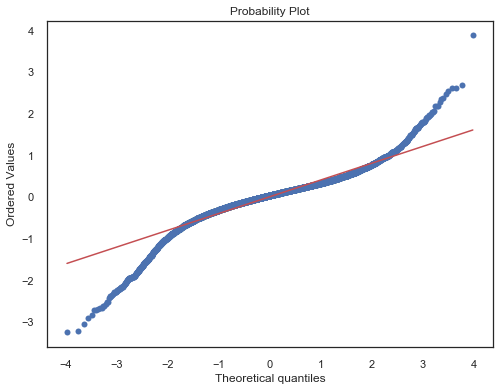

In [83]:
ridge = linear_model.Ridge(alpha=.3)
ridge = ridge.fit(X_train_poly,y_train.values.ravel())
ridge_preds = ridge.predict(X_test_poly)
ridge_residual = (y_test['log_price'] - ridge_preds)
fig, ax = plt.subplots(figsize=(8,6))
sp.stats.probplot(ridge_residual, plot=ax, fit=True)

/Users/lucas/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8441.215076736395, tolerance: 5.735050679930177
  positive)


((array([-3.97762902, -3.76141249, -3.64309776, ...,  3.64309776,
          3.76141249,  3.97762902]),
  array([-3.24535202, -3.20428283, -3.08388726, ...,  2.58306208,
          2.67494461,  3.99498973])),
 (0.4265964399802744, -0.00023833829535728306, 0.9667476807200397))

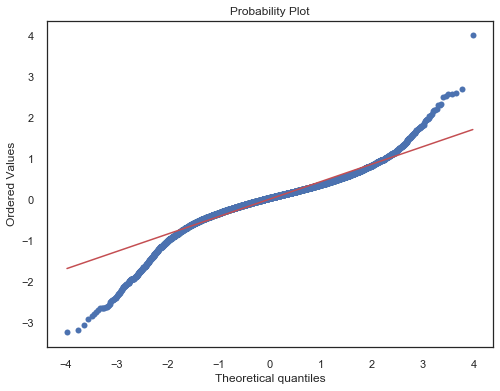

In [71]:
lasso = linear_model.Lasso(alpha=.01)
lasso = lasso.fit(X_train_poly,y_train)
lasso_preds = lasso.predict(X_test_poly)
lasso_residual = (y_test['log_price'] - lasso_preds)
fig, ax = plt.subplots(figsize=(8,6))
sp.stats.probplot(lasso_residual, plot=ax, fit=True)

((array([-3.97762902, -3.76141249, -3.64309776, ...,  3.64309776,
          3.76141249,  3.97762902]),
  array([-3.33198549, -3.08739269, -3.0297277 , ...,  2.45663495,
          2.54683042,  3.9714723 ])),
 (0.3347155884409251, 0.002746775837844892, 0.9452369325837479))

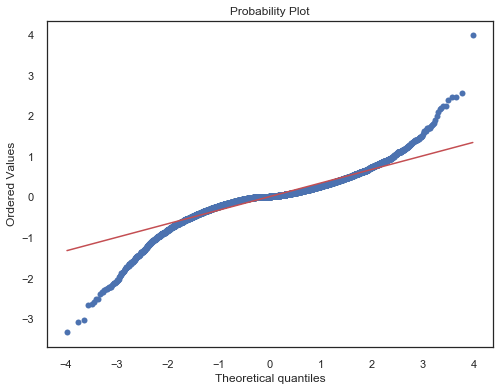

In [72]:
rf = RandomForestRegressor(n_estimators=100)
rf = rf.fit(X_train_poly,y_train.values.ravel())
rf_preds = rf.predict(X_test_poly)
rf_residual = (y_test['log_price'] - rf_preds)
fig, ax = plt.subplots(figsize=(8,6))
sp.stats.probplot(rf_residual, plot=ax, fit=True)

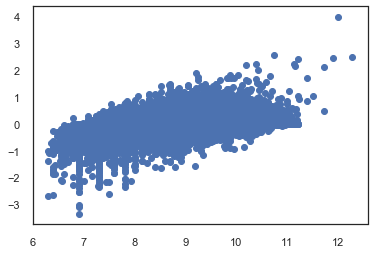

In [73]:
plt.scatter(x=y_test, y=rf_residual);

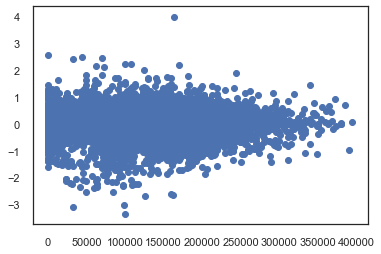

In [74]:
plt.scatter(x=X_test.odometer, y=rf_residual);

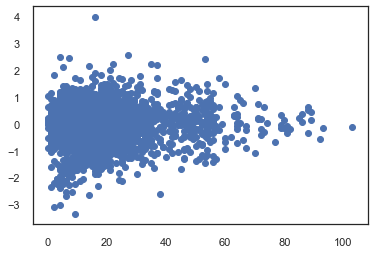

In [75]:
plt.scatter(x=X_test.age, y=rf_residual);

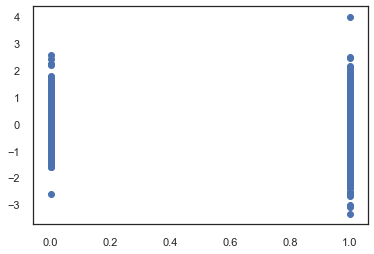

In [76]:
plt.scatter(x=X_test.transmission, y=rf_residual);

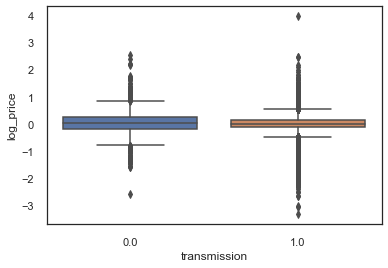

In [77]:
sns.boxplot(x=X_test.transmission, y=rf_residual)

Text(0.5, 1.0, 'residuals as a function of odometer reading')

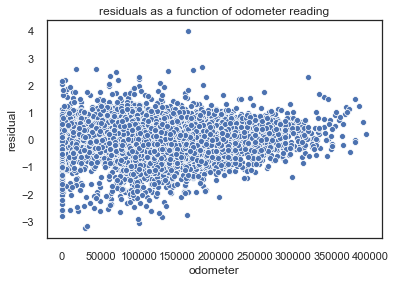

In [78]:
sns.scatterplot(x=X_test.odometer, y=lasso_residual);
plt.ylabel('residual')
plt.title('residuals as a function of odometer reading')

Text(0.5, 1.0, 'residuals as a function of age')

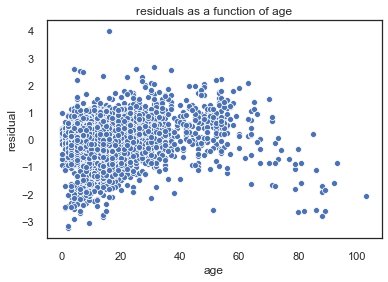

In [79]:
sns.scatterplot(x=X_test.age, y=lasso_residual);
plt.ylabel('residual')
plt.title('residuals as a function of age')

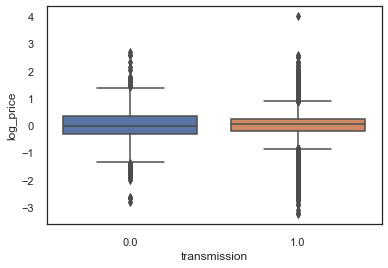

In [80]:
sns.boxplot(x=X_test.transmission, y=lasso_residual)

# GIT Push-Pull Validation